In [31]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [64]:
Data_path = "/u/home/m/mardren/SequenceML"

gkm_path = "%s/features.gkSVM.HepG2.tsv.gz"%Data_path
conv_path       = "%s/features.dragoNN_ConvModel.HepG2.SV40P.Rep1.tsv.gz"%Data_path
deepfact_path       = "%s/features.dragoNN_DeepFactorizedModel.HepG2.minP.Rep1.tsv.gz"%Data_path
kmer_path = "%s/6mer_predictions.pkl"%Data_path

gkm = pd.read_csv(gkm_path, header = 0, index_col = 0, sep = '\t')
conv  = pd.read_csv(conv_path, header = 0, index_col = 0, sep = '\t')
deepfact = pd.read_csv(deepfact_path, header = 0, index_col = 0, sep = '\t')
kmer = pd.read_pickle('%s'%(kmer_path))

gkm_15 = gkm[['feat_gksvm_15']]
gkm_15 = gkm_15.rename(columns = {'feat_gksvm_15':'gkm_15'})
conv_15 = conv[['15']]
conv_15 = conv_15.rename(columns = {'15':'conv_15'})
deepfact_15 = deepfact[['15']]
deepfact_15 = deepfact_15.rename(columns = {'15':'deepfact_15'})
kmer = kmer.rename(columns = {'label':'kmer_15'})




In [3]:
kmer

,kmer_15,prediction
region_id,,
H1hesc_10_0_chr9_108475935,-1.087365,-0.067597
H1hesc_10_10_chr3_13672895,-1.391041,-0.346080
H1hesc_10_11_chr8_41583315,0.975140,-0.176071
H1hesc_10_12_chr3_183889475,1.081712,-0.754949
H1hesc_10_13_chr3_138502495,-0.935362,0.133559
...,...,...
K562_9_96_chr6_152416495,1.846433,1.119100
K562_9_97_chr3_170719195,-1.198396,0.327971
K562_9_98_chr1_196018775,-0.198396,0.606866


In [65]:
data = pd.concat([conv_15, gkm_15, deepfact_15, kmer], axis=1)


In [34]:
data

,conv_15,gkm_15,deepfact_15,kmer_15,prediction
region_id,,,,,
H1hesc_10_0_chr9_108475935,-0.055890,0.132106,0.142312,-1.087365,-0.067597
H1hesc_10_10_chr3_13672895,0.149902,0.013145,-0.262623,-1.391041,-0.346080
H1hesc_10_11_chr8_41583315,-0.194376,0.050826,0.145076,0.975140,-0.176071
H1hesc_10_12_chr3_183889475,0.081191,0.064345,0.338965,1.081712,-0.754949
H1hesc_10_13_chr3_138502495,-0.368951,0.045163,0.235830,-0.935362,0.133559
...,...,...,...,...,...
K562_9_96_chr6_152416495,0.644106,0.141500,0.908556,1.846433,1.119100
K562_9_97_chr3_170719195,-0.113810,0.275966,-0.105357,-1.198396,0.327971
K562_9_98_chr1_196018775,-0.123301,-0.033204,0.203964,-0.198396,0.606866


In [66]:
data = data.reset_index()
data

,region_id,conv_15,gkm_15,deepfact_15,kmer_15,prediction
0,H1hesc_10_0_chr9_108475935,-0.055890,0.132106,0.142312,-1.087365,-0.067597
1,H1hesc_10_10_chr3_13672895,0.149902,0.013145,-0.262623,-1.391041,-0.346080
2,H1hesc_10_11_chr8_41583315,-0.194376,0.050826,0.145076,0.975140,-0.176071
3,H1hesc_10_12_chr3_183889475,0.081191,0.064345,0.338965,1.081712,-0.754949
4,H1hesc_10_13_chr3_138502495,-0.368951,0.045163,0.235830,-0.935362,0.133559
...,...,...,...,...,...,...
15715,K562_9_96_chr6_152416495,0.644106,0.141500,0.908556,1.846433,1.119100
15716,K562_9_97_chr3_170719195,-0.113810,0.275966,-0.105357,-1.198396,0.327971
15717,K562_9_98_chr1_196018775,-0.123301,-0.033204,0.203964,-0.198396,0.606866
15718,K562_9_99_chr1_15433275,-0.000221,0.105710,-0.275707,-0.372044,-1.268111


In [67]:
data['chrom'] = data['region_id'].str.split('_').str[3]
data

,region_id,conv_15,gkm_15,deepfact_15,kmer_15,prediction,chrom
0,H1hesc_10_0_chr9_108475935,-0.055890,0.132106,0.142312,-1.087365,-0.067597,chr9
1,H1hesc_10_10_chr3_13672895,0.149902,0.013145,-0.262623,-1.391041,-0.346080,chr3
2,H1hesc_10_11_chr8_41583315,-0.194376,0.050826,0.145076,0.975140,-0.176071,chr8
3,H1hesc_10_12_chr3_183889475,0.081191,0.064345,0.338965,1.081712,-0.754949,chr3
4,H1hesc_10_13_chr3_138502495,-0.368951,0.045163,0.235830,-0.935362,0.133559,chr3
...,...,...,...,...,...,...,...
15715,K562_9_96_chr6_152416495,0.644106,0.141500,0.908556,1.846433,1.119100,chr6
15716,K562_9_97_chr3_170719195,-0.113810,0.275966,-0.105357,-1.198396,0.327971,chr3
15717,K562_9_98_chr1_196018775,-0.123301,-0.033204,0.203964,-0.198396,0.606866,chr1
15718,K562_9_99_chr1_15433275,-0.000221,0.105710,-0.275707,-0.372044,-1.268111,chr1


In [68]:
#setting aside chr1 and chr2 for testing data
testing_data_chr1 = data[data["chrom"] == 'chr1']
testing_data_chr2 = data[data["chrom"] == 'chr2']
test_set = pd.concat([testing_data_chr1, testing_data_chr2])
#removing chr1 and chr2 from training data
training_data_nochr1 = data[data["chrom"] != 'chr1']
train_set = training_data_nochr1[training_data_nochr1["chrom"] != 'chr2']
#dropping the chrom column
test_set = test_set.drop(columns=['chrom'])
train_set = train_set.drop(columns=['chrom'])
data = data.drop(columns=['chrom'])



print(train_set.shape, test_set.shape)


(12888, 6) (2832, 6)


In [9]:
test_set

,region_id,conv_15,gkm_15,deepfact_15,kmer_15,prediction
13,H1hesc_10_21_chr1_2238075,-0.383960,0.035259,-0.019755,0.686126,-0.813227
23,H1hesc_10_30_chr1_207992455,-0.000268,0.250805,-0.028119,-1.354901,0.023929
37,H1hesc_10_7_chr1_12609975,0.076648,0.291972,0.627575,2.108102,-0.021496
41,H1hesc_11_10_chr1_42638235,0.200400,0.218674,0.760118,-1.852900,-0.046416
43,H1hesc_11_12_chr1_70953075,0.133456,0.116247,0.004871,1.487198,-0.171344
...,...,...,...,...,...,...
15659,K562_9_45_chr2_190956955,-0.153253,0.142208,0.097346,4.971529,-0.087745
15670,K562_9_55_chr2_196407915,-0.062781,0.090079,0.715197,2.064638,1.052274
15680,K562_9_64_chr2_21279395,-0.196315,0.177633,-0.353137,-3.198396,0.029724
15691,K562_9_74_chr2_20285795,0.126100,0.182553,-0.248195,-1.198396,-0.541526


In [69]:
#format the training data
labels = train_set['prediction'].values
train_set = train_set.drop(columns=['region_id','prediction'])
encodings = train_set.values.tolist()
encodings = np.asarray(encodings)
encodings_df = pd.DataFrame(encodings)
encodings_df.fillna(encodings_df.mean(), inplace=True)
encodings = encodings_df.to_numpy()
labels = np.reshape(labels,(12888,))


#format the testing data
test_labels = test_set['prediction'].values
test_set = test_set.drop(columns=['region_id','prediction'])
test_encodings = test_set.values.tolist()
test_encodings = np.asarray(test_encodings)
test_encodings_df = pd.DataFrame(test_encodings)
test_encodings_df.fillna(test_encodings_df.mean(), inplace=True)
test_encodings = test_encodings_df.to_numpy()
test_labels = np.reshape(test_labels,(2832,))






#del train_set, test_set

In [11]:
test_set

,conv_15,gkm_15,deepfact_15,kmer_15
13,-0.383960,0.035259,-0.019755,0.686126
23,-0.000268,0.250805,-0.028119,-1.354901
37,0.076648,0.291972,0.627575,2.108102
41,0.200400,0.218674,0.760118,-1.852900
43,0.133456,0.116247,0.004871,1.487198
...,...,...,...,...
15659,-0.153253,0.142208,0.097346,4.971529
15670,-0.062781,0.090079,0.715197,2.064638
15680,-0.196315,0.177633,-0.353137,-3.198396
15691,0.126100,0.182553,-0.248195,-1.198396


In [12]:
test_encodings

array([[-3.83960000e-01,  3.52588667e-02, -1.97554000e-02,
         6.86126403e-01],
       [-2.67792500e-04,  2.50805281e-01, -2.81192330e-02,
        -1.35490087e+00],
       [ 7.66476540e-02,  2.91972370e-01,  6.27574740e-01,
         2.10810167e+00],
       ...,
       [-1.96314840e-01,  1.77632881e-01, -3.53137170e-01,
        -3.19839638e+00],
       [ 1.26100080e-01,  1.82552637e-01, -2.48194990e-01,
        -1.19839638e+00],
       [ 2.58661200e-02,  1.47115926e-01, -1.23241894e-01,
         6.75396528e-01]])

In [13]:
test_labels

array([-0.81322682,  0.02392913, -0.021496  , ...,  0.02972358,
       -0.54152584,  0.33581687])

In [90]:
#train a linear regressor on the training dataset. 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True,alpha = 0.00001, l1_ratio = .8).fit(encodings, labels)
# sequence_regressor = LinearRegression()
# sequence_regressor.fit(encodings, labels)
# sequence_regressor.ElasticNet()

In [91]:
encodings_subset = encodings[:5]
labels_subset = labels[:5]
from sklearn.metrics import mean_squared_error

ypred = elastic.predict(encodings_subset)
score = elastic.score(encodings_subset, labels_subset)
mse = mean_squared_error(labels_subset, ypred)


In [92]:
#check mean_squared_error

test_predictions = elastic.predict(test_encodings)
test_mse = mean_squared_error(test_predictions, test_labels)
test_rmse = np.sqrt(test_mse)

# train_predictions = sequence_regressor.predict(encodings)
# train_mse = mean_squared_error(train_predictions, labels)
# train_rmse = np.sqrt(train_mse)

print("Root Mean Squared error on test set is:     ", test_rmse)

# print("Root Mean Squared error on training set is: ", train_rmse)


Root Mean Squared error on test set is:      0.6042677656454443


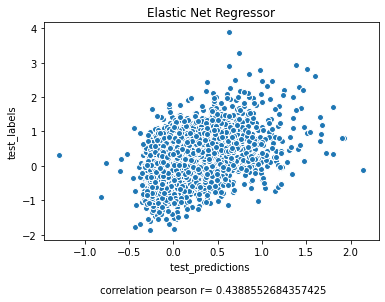

In [93]:
flat_test_labels=test_labels.flatten()
flat_test_predictions=test_predictions.flatten()
#visualize the results
caption = "correlation pearson r= %s"%(pd.Series(flat_test_predictions).corr(pd.Series(flat_test_labels)))


plt.scatter(
    x=flat_test_predictions,
    y=flat_test_labels,
    edgecolors='w'
)

plt.title("Elastic Net Regressor")
plt.xlabel("test_predictions \n\n %s"%caption)
plt.ylabel("test_labels")

plt.show()

In [94]:
print(elastic.coef_)

[0.07350744 0.7706446  0.8218048  0.02713657]
